## ORIE 5580/5581: Homework 5

### Bowen Gao (bg453), Soobin Lee (dyl44)

### Problem 1

#### (a)

The estimate of the average time a passenger spends waiting for the next bus is as follows.

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import pandas as pd
import scipy.linalg
import scipy.stats
import scipy as sc
%matplotlib inline

In [11]:
n = 50000
X = np.zeros(n)
t = 0
for i in range(n):
    
    t = t + np.random.exponential(1. / 2)
    X[i] = t

n_of_bus = np.ceil(X[n - 1] / 10)

j = 1
idx_l = 0
sum_wait_time = 0
for i in range(n):
    if X[i] > j * 10:
        wait_time_j = (i - idx_l) * (j * 10) - sum(X[idx_l:i])
        sum_wait_time = sum_wait_time + wait_time_j
        idx_l = i
        j = j + 1
        
wait_time_last = (n - idx_l) * (j * 10) - sum(X[idx_l:n])
sum_wait_time = sum_wait_time + wait_time_last
avg_wait_time = sum_wait_time / (n + 0.)
print ("Average waiting time =", avg_wait_time, "minutes.")

Average waiting time = 5.00745950689 minutes.


#### (b)

Now we suppose that the buses arrive to the bus stop according to an exponential distribution with mean 10 minutes. We can see that the average waiting has increased. 

In [26]:
n = 50000
X = np.zeros(n)
t = 0
for i in range(n):
    t = t + np.random.exponential(1. / 2)
    X[i] = t

bus = []
t_bus = 0
while t_bus < X[-1]:
    t_bus = t_bus + np.random.exponential(10.)
    bus.append(t_bus)

j = 0
idx_l = 0
sum_wait_time = 0
for i in range(50000):
    if X[i] > bus[j]:
        wait_time_j = (i - idx_l) * bus[j] - sum(X[idx_l:i])
        sum_wait_time = sum_wait_time + wait_time_j
        idx_l = i
        j = j + 1

wait_time_last = (n - idx_l) * bus[j] - sum(X[idx_l:n])
sum_wait_time = sum_wait_time + wait_time_last
avg_wait_time = sum_wait_time / (n + 0.)
print ("Average waiting time =", avg_wait_time, "minutes.")

Average waiting time = 10.1565824386 minutes.


#### (c)

The estimate of the average interarrival time between buses that each passenger experiences is as follows. This is different than what we had expected.

In [27]:
interval = np.diff(bus)
avg_interval =  np.mean(interval)

print ("Estimate =", avg_interval)

Estimate = 10.1308995779


#### (d)

The bus service claims that there is a bus every 10 minutes. This is roughly similar to what passengers experience in part (c), and the bus service is not wrong. If buses arrive to the bus stop deterministically every 10 minutes, then a passenger has to wait about 5 minutes, on average. However, if the buses arrive according to an Exponential distribution with a mean of 10 minutes, then the expected waiting time is not 5 minutes as we might expect. We notice that passengers will wait longer than half of the expected interarrival time of buses, on average. This is due to the memoryless property of the Exponential distribution, which implies that the expected time until the next bus arrives is the same no matter how long since the last bus arrived.



### Problem 2

The estimate and its corresponding $95\%$ confidence interval of the probability that all three financial products simultaneously yield a positive return are as follows. We first compute the Cholesky decomposition of the covariance matrix.

In [2]:
# Compute Cholesky decomposition
sigma = np.matrix([[0.0625, -0.01, 0.0375], [-0.01, 0.01, -0.015], [0.0375, -0.015, 0.09]])
L = scipy.linalg.cholesky(sigma, lower = True)
print(L)

[[ 0.25        0.          0.        ]
 [-0.04        0.09165151  0.        ]
 [ 0.15       -0.09819805  0.24053512]]


In [3]:
# Estimate probability that all three financial products simultaneously yield a positive return
n = 20000

pos_return = np.zeros(n)
mu = np.array([0.14, 0.07, 0.16])

for i in range(n):
    N = np.random.normal(0, 1, 3)
    X = mu + np.dot(L, N)
    
    if X[0] > 0 and X[1] > 0 and X[2] > 0:
        pos_return[i] = 1

avg = np.mean(pos_return)
LB = avg - scipy.stats.norm.ppf(0.975) * np.sqrt(np.var(pos_return, ddof = 1) / n)
UB = avg + scipy.stats.norm.ppf(0.975) * np.sqrt(np.var(pos_return, ddof = 1) / n)

print("Estimate =", avg)
print("95% CI = (", LB, ",", UB, ")")

Estimate = 0.3712
95% CI = ( 0.364504173357 , 0.377895826643 )


If all three instruments were independent of each other, the estimate of the probability would be as follows.

In [6]:
# Estimate probability if all three instruments were independent of each other
independent_prob = (1 - scipy.stats.norm.cdf(0, 0.14, 0.25)) * (1 - scipy.stats.norm.cdf(0, 0.07, 0.10)) * (1 - scipy.stats.norm.cdf(0, 0.16, 0.3))
print("Esimate =", independent_prob)

Esimate = 0.379616405667


### Problem 3

A coffee shop in downtown Ithaca sees a Poisson arrival process with rate 

$$\lambda(t) = \frac{1}{56}(-5t^3 + 90t^2 - 300t + 760) \text{  for } 0 \leq t \leq 12,$$

over the 12 hours on the weekdays it is open.

#### (a)

The number of arrivals over the 12 hours has a Poisson distribution with parameter

\begin{align*}
\int_{0}^{12} \lambda(t) \: dt &= \int_{0}^{12} \frac{1}{56}(-5t^3 + 90t^2 - 300t + 760) \: dt \\
&= \frac{1}{56} (13,440) \\
&= 240.
\end{align*}

If $N$ is the number of arrivals and $\lambda = 240$, then the exact probability that the coffee store will see more than 250 customers in one 12 hour day is

\begin{align*}
P(N > 250) &= 1 - P(N \leq 250) \\
&= 1 - \sum_{k = 0}^{250} \frac{\lambda^k e^{-\lambda}}{k!} \\
&\approx 0.247.
\end{align*}

#### (b)

We find that $\lambda'(t) = -\frac{15}{56}(t^2 - 12t + 20) = 0$ when $t = 2$ or $t = 10.$ Since the rate is maximized at $t = 10$, $\lambda^*$ = $\lambda(10)$ = 220/7. The estimate of the probability and its $95\%$ confidence interval are as follows.

In [32]:
def NPP():
    X =0
    T = 0
    T_s = 0
    lambda_b = 220. / 7.
    while T <= 12:
        T_s = T_s + np.random.exponential(1. / lambda_b)
        U = np.random.rand()
        lambda_T_s = (1. / 56) * ((-5) * T_s ** 3 + 90 * T_s ** 2 - 300 * T_s + 760)
        if U > (lambda_T_s + 0.) / lambda_b:
            continue
        else:
            T = T_s
            X = X + 1
    return X

# print NPP()
nums = [NPP() > 250 for i in range(500)]


print ("Estimate =", np.mean(nums))

var = np.var(nums, ddof = 1)
LB = np.mean(nums) - scipy.stats.norm.ppf(0.975) * np.sqrt(var / 500)
RB = np.mean(nums) + scipy.stats.norm.ppf(0.975) * np.sqrt(var / 500)
print("95% CI = (", LB, ",", RB, ")")

Estimate = 0.276
95% CI = ( 0.236778730889 , 0.315221269111 )


#### (c)

Both the bar plot and rate function $\lambda(t)$ are shown below. We can see that they both follow the same shape.

[ 11.658   9.118   8.648  10.64   14.226  17.614  21.95   26.162  29.286
  31.384  30.926  28.656]


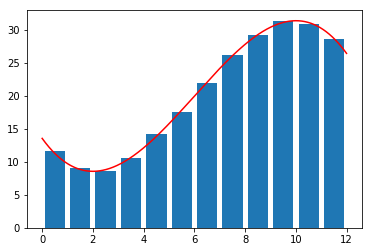

In [34]:
def NPP_T():
    T_list = []
    T = 0
    T_s = 0
    lambda_b = 220. / 7.
    while T <= 12:
        T_s = T_s + np.random.exponential(1. / lambda_b)
        U = np.random.rand()
        lambda_T_s = (1. / 56) * ((-5) * T_s ** 3 + 90 * T_s ** 2 - 300 * T_s + 760)
        if U > (lambda_T_s + 0.) / lambda_b:
            continue
        else:
            T = T_s
            T_list.append(T)
    return T_list
            
def nums_12 (T_list):
    nums_12 = np.zeros(12)
    for i in range(12):
        nums_12[i] = np.sum(np.array([m > i for m in T_list]) & np.array([n <= i+1 for n in T_list]))
    return nums_12

data = np.zeros((500, 12))
for i in range(500):
    data[i, :] = nums_12(NPP_T())

result = np.zeros(12)
for i in range(12):
    result[i] = np.mean(data[: , i])

print (result)
r = [i + 0.5 for i in range(len(result))]
plt.bar(r, result)
x = [i / 1500. * 12 for i in range(1500)]
fx = [(1. / 56)*((-5) * i ** 3 + 90 * i ** 2 - 300 * i + 760) for i in x]
plt.plot(x, fx, 'r')
plt.show()

### Problem 4

#### (a)

We plot the empirical histogram and empirical CDF of the data. The first and second moments of the data are $m_1 = 3.933$ and $m_2 = 21.387$, respectively.

In [11]:
# Load data
data = pd.read_csv('/Users/SoobinLee/Desktop/ORIE_5580_2017/Psets/hotel_data.csv', header = None).values.flatten()

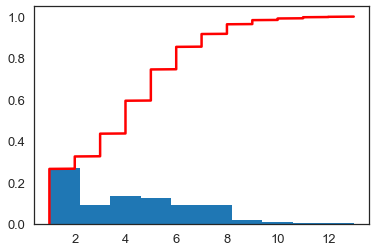

m1 = 3.933  m2 = 21.387


In [22]:
# Empirical Histogram and CDF
n = len(data)

plt.hist(data, normed = 1)

sorted_data = np.sort(data)
Y = (np.arange(len(sorted_data)) + 0.5 * np.ones(n)) / len(sorted_data)
plt.plot(sorted_data, Y, color = 'r')
plt.show()

# Compute first and second moments
m1 = np.mean(data)
m2 = np.mean(data ** 2)
print ('m1 =', m1, '','m2 =', m2)

#### (b)

Next, we choose the Poisson parameter $\lambda$ using the MLE method, and study the fit using the Q-Q plot. The data  follow a somewhat linear trend, but we can see that there are some points that deviate from the pattern. We might consider a different distribution that may be a more appropriate model for the data.

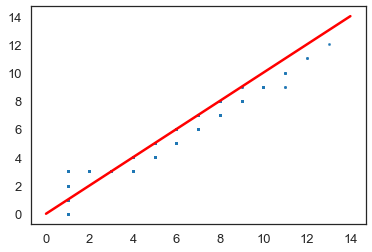

In [23]:
MLE = m1
Z_poi = scipy.stats.poisson.ppf(Y, MLE)
plt.scatter(sorted_data, Z_poi, s = 5)
plt.plot(range(15), 'r')
plt.show()

#### (c)

Using the given facts,

\begin{align*}
E(Z) &= \alpha + (1 - \alpha)(1 + \lambda) = 3.933 \\
E(Z^2) &= \alpha + (1 - \alpha)(\lambda + (1 + \lambda)^2) = 21.387.
\end{align*}

We find that $\widehat{\alpha} = 0.26$ and $\widehat{\lambda} = 3.95.$

In [6]:
# Solve for unknowns alpha and lambda
from sympy import *

x, y = symbols('x y')
solve([Eq(x + (1 - x) * (1 + y), 3.933), Eq(x + (1 - x) * (y + (1 + y) ** 2), 21.389)], [x, y])

[(0.257766264020708, 3.95158540743266)]

#### (d)

Based on the Q-Q plot below, the data follow a linear trend, so the mixture distribution seems to be an appropriate model for the data.

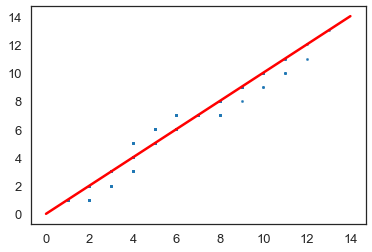

In [32]:
Z = np.zeros(len(Y))
for i in range(len(Y)):
    if Y[i] <= alpha:
        Z[i] = 1
    else:
        Z[i] = 1 +  scipy.stats.poisson.ppf((Y[i] - alpha) / (1. - alpha), mix_lambda)

plt.scatter(sorted_data, Z, s = 5)
plt.plot(range(15), 'r')
plt.show()